In [0]:
# SOM
# from https://www.superdatascience.com/deep-learning/ 


# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [77]:
# Install MiniSOM
# https://github.com/JustGlowing/minisom 
!pip install minisom

In [78]:
# Getting the data

import os
import tarfile
from six.moves import urllib
import csv

FILE_TO_DOWNLOAD =  "objetosECores.csv"
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rodolfostark/ColorSensorMachineLearning/"
DATA_PATH = "master/"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  urllib.request.urlretrieve(data_url, data_path+file_to_download)
  
fetch_data()

# observando se o diretório datasets foi criado com sucesso 
# !ls dados


!ls master/

objetosECores.csv


In [79]:
#processo de leitura do arquivo de DADOS

leitura = csv.reader(open('master/objetosECores.csv','r'))
leitura = list(leitura) # tem que converter pra lista primeiro
leitura = np.array(leitura)# e depois converte pra array
#leitura2 = leitura.astype(int)
# sequencias de testes pra checar se o array foi gerado de forma correta
#print (leitura)
print("\n")
#print(leitura[0])
print("\n")
#print(leitura[0][0])

objetos_coloridos = leitura [1:,0:3] # objeto vermelho é o array apenas numérico
objetos_coloridos = objetos_coloridos.astype(float)
print(objetos_coloridos)
y = leitura [1:,3] # objeto vermelho é o array apenas numérico
y = y.astype(int)
print(y)






[[ 76. 272.  48.]
 [ 68. 272.  48.]
 [ 76. 264.  48.]
 [ 75. 258.  48.]
 [ 76. 273.  48.]
 [ 76. 273.  48.]
 [ 76. 273.  48.]
 [ 76. 274.  48.]
 [ 76. 266.  48.]
 [ 72. 281.  43.]
 [ 78. 276.  49.]
 [ 78. 267.  49.]
 [ 78. 274.  49.]
 [ 78. 281.  49.]
 [ 78. 282.  49.]
 [ 78. 282.  50.]
 [ 78. 276.  50.]
 [ 78. 282.  49.]
 [126.  67.  23.]
 [127.  60.  23.]
 [121.  68.  22.]
 [127.  68.  23.]
 [127.  64.  23.]
 [119.  68.  22.]
 [127.  68.  22.]
 [121.  67.  22.]
 [126.  67.  22.]
 [122.  67.  22.]
 [122.  59.  22.]
 [122.  67.  22.]
 [116.  67.  22.]
 [114.  67.  22.]
 [122.  67.  22.]
 [122.  67.  22.]
 [122.  67.  22.]
 [122.  67.  22.]
 [157. 154.  39.]
 [157. 154.  39.]
 [151. 154.  39.]
 [158. 148.  39.]
 [158. 154.  39.]
 [158. 155.  39.]
 [151. 148.  39.]
 [158. 154.  39.]
 [157. 155.  39.]
 [158. 155.  40.]
 [152. 155.  39.]
 [159. 149.  39.]
 [158. 156.  39.]
 [159. 156.  39.]
 [159. 156.  39.]
 [159. 156.  39.]
 [158. 156.  39.]
 [153. 156.  39.]]
[-1 -1 -1 -1 -1 -1 -1 -

In [0]:
X = objetos_coloridos

# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 25, y = 25, input_len = 3, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

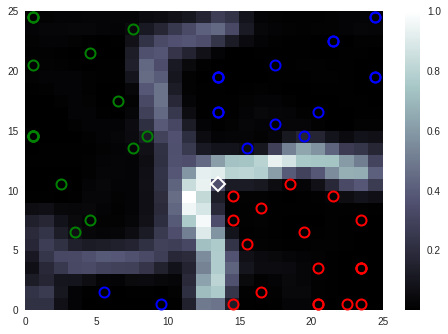

In [81]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 'o', 'o']
colors = ['r', 'g', 'b']

#futher read https://matplotlib.org/2.0.2/api/colors_api.html

teste_vermelho = [45, 156, 115]
teste_verde = [101, 67, 65]
teste_azul = [172, 184, 104]



for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[1+y[i]],
         markeredgecolor = colors[1+y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2) 
    
m = som.winner(teste_vermelho)
plot(m[0] + 0.5, m[1] + 0.5, 'D', markeredgecolor = 'w',  markerfacecolor = 'None',  markersize = 10,  markeredgewidth = 2)

show()


